**Car Dataset Analysis Project**

The goal is to **clean, transform, and analyze** the data by performing the tasks below.





# **Getting started**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns





In [ ]:
# Providing data via GitHub URL ensures availability without requiring access to a Google Drive account.

# GitHub Raw-URL zur CSV-Datei
url = "https://raw.githubusercontent.com/KonstantinData/courses_certificates_journals/refs/heads/main/Python/car_data_project/car_data.csv"

# CSV-Datei direkt in Pandas einlesen
df_car_raw = pd.read_csv(url)

# This is the data provided as raw data
# I named the dataframe df_car_raw


In [ ]:
# Take a first look at the data
df_car_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df_car_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**In the first step I create a copy of the raw data**

In [ ]:
df_car = df_car_raw.copy()
df_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# **Data Cleaning**  

  



**Overview**  
To ensure data quality and consistency, several cleaning steps were applied:  

Handling Missing Data
- Analyzed missing values across all columns.  
- Filled minor gaps using imputation techniques (mean, median, or mode) where appropriate.  
- Removed or replaced columns with excessive missing values based on their analytical importance.  

Data Type Conversion
- Ensured proper data types for analysis (e.g., converting `Year` to integer or float).  

Filtering Data
- Retained only vehicles manufactured in 1995 or later.  

String Standardization
- Adjusted text formatting in `Vehicle Style` and `Market Category` as required by the analysis.  


In [ ]:
# First step: Getting an overview of the missing data.
missing_values = df_car.isna().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


### **Engine Fuel Type**
Please expand the view to see the edits made to the Engine Fuel Type column.

In [ ]:
# Checking which vehicles are affected by .isna values.
print(df_car[df_car['Engine Fuel Type'].isna()])

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  


In [ ]:
## Using Brand, Model, Year, Engine HP, and Cylinder to find additional information on Engine Fuel Type.
print(df_car[(df_car["Make"] == "Suzuki") & (df_car["Model"] == "Verona")])

## The results suggest that the three NaN positions likely have the same fuel type as the additionally identified vehicle types.

         Make   Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004               NaN      155.0               6.0   
11322  Suzuki  Verona  2004               NaN      155.0               6.0   
11323  Suzuki  Verona  2004               NaN      155.0               6.0   
11324  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11325  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11326  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11327  Suzuki  Verona  2005  regular unleaded      155.0               6.0   
11328  Suzuki  Verona  2006  regular unleaded      155.0               6.0   
11329  Suzuki  Verona  2006  regular unleaded      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0  

In [ ]:
# Updating "Engine Fuel Type" to "regular unleaded" for matching rows in df_car.

df_car.loc[
    (df_car["Make"] == "Suzuki") &
    (df_car["Model"] == "Verona") &
    (df_car["Year"] == 2004),
    "Engine Fuel Type"
] = "regular unleaded"

# Then, verifying the update by printing rows where "Engine Fuel Type" is still NaN.
print(df_car[df_car['Engine Fuel Type'].isna()])


Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


### **Engine HP**

Please expand the view to see the edits made to the Engine HP column.

>To address the missing values in the Engine HP column, I initially attempted to set up an API connection with High-Mobility using Postman to retrieve accurate vehicle specifications. However, the automation setup was unsuccessful, and I plan to revisit this approach in the next phase of the project.

>As an alternative solution, I leveraged internet research with ChatGPT to identify the missing values. To ensure accuracy, I cross-checked selected entries manually using Google searches. Finally, I incorporated the refined data into the dataset and saved it as a new CSV file.

In [ ]:
# Sufficient relevant data is needed to perform a search.
# The index is used as a reference to match the results.
pd.set_option('display.max_rows', None)
print(df_car[(df_car["Engine HP"].isna())].head(70))

               Make        Model  Year                  Engine Fuel Type  \
539            FIAT         500e  2015                          electric   
540            FIAT         500e  2016                          electric   
541            FIAT         500e  2017                          electric   
2905        Lincoln  Continental  2017    premium unleaded (recommended)   
2906        Lincoln  Continental  2017    premium unleaded (recommended)   
2907        Lincoln  Continental  2017    premium unleaded (recommended)   
2908        Lincoln  Continental  2017    premium unleaded (recommended)   
4203           Ford       Escape  2017                  regular unleaded   
4204           Ford       Escape  2017                  regular unleaded   
4205           Ford       Escape  2017                  regular unleaded   
4206           Ford       Escape  2017                  regular unleaded   
4705          Honda       Fit EV  2013                          electric   
4706        

In [ ]:
# I determined the missing *Engine HP* values through internet research using ChatGPT.
# Additionally, I randomly verified some values for accuracy via Google search.
# The updated data was saved as a new CSV file, which I now import here.

# GitHub Raw-URL zur CSV-Datei
url = "https://raw.githubusercontent.com/KonstantinData/courses_certificates_journals/refs/heads/main/Python/car_data_project/updated_engine_hp.csv"

# CSV-Datei direkt in Pandas einlesen
updated_engine_hp = pd.read_csv(url)

# Ausgabe der geladenen Daten
print(updated_engine_hp.head())


   Index     Make        Model  Year  Engine HP  Engine Cylinders
0    539     FIAT         500e  2015        111                 0
1    540     FIAT         500e  2016        111                 0
2    541     FIAT         500e  2017        111                 0
3   2905  Lincoln  Continental  2017        305                 6
4   2906  Lincoln  Continental  2017        305                 6


In [ ]:
# Updated missing "Engine HP" values in df_car by setting "Index" as the index in updated_engine_hp.
# Used df_car.update(updated_engine_hp[["Engine HP"]]) to replace only missing values while preserving the structure.
# Verified the update by printing rows where "Engine HP" is still NaN.

updated_engine_hp.set_index("Index", inplace=True)

df_car.update(updated_engine_hp[["Engine HP"]])

print(df_car[df_car["Engine HP"].isna()])

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


### **Engine Cylinders**

Please expand the view to see the edits made to the Engine Cylinders column.

In [ ]:
# Due to the manageable number of .isna values, I am reviewing the specific positions.
pd.set_option('display.max_rows', None)
print(df_car[df_car['Engine Cylinders'].isna()])


            Make    Model  Year             Engine Fuel Type  Engine HP  \
1983   Chevrolet  Bolt EV  2017                     electric      200.0   
1984   Chevrolet  Bolt EV  2017                     electric      200.0   
3716  Volkswagen   e-Golf  2015                     electric      115.0   
3717  Volkswagen   e-Golf  2015                     electric      115.0   
3718  Volkswagen   e-Golf  2016                     electric      115.0   
3719  Volkswagen   e-Golf  2016                     electric      115.0   
5778  Mitsubishi   i-MiEV  2014                     electric       66.0   
5779  Mitsubishi   i-MiEV  2016                     electric       66.0   
5780  Mitsubishi   i-MiEV  2017                     electric       66.0   
8373      Toyota  RAV4 EV  2012                     electric      154.0   
8695       Mazda     RX-7  1993             regular unleaded      255.0   
8696       Mazda     RX-7  1994             regular unleaded      255.0   
8697       Mazda     RX-7

In [ ]:
# Research indicates that NaN values in "Engine Cylinders" correspond to either electric vehicles or Wankel engines,
# both of which have no cylinders.

# Replaced missing values in "Engine Cylinders" with 0 to ensure consistent representation for vehicles with unknown or absent cylinder data.
df_car['Engine Cylinders'] = df_car['Engine Cylinders'].fillna(0)

# Then, verifying the update by printing rows where "Engine Cylinders" is still NaN.
print(df_car[df_car['Engine Cylinders'].isna()])

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


## **Further Cleaning**  

Expand the view to review the additional cleaning steps applied to the dataset.  



**Drop Duplicates**

In [ ]:
pd.reset_option('display.max_rows')

# Removing duplicate rows to ensure data consistency and accuracy.
df_car.drop_duplicates()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**Cleaning labels**

In [ ]:
# Cleaning labels by removing additional information that is not needed in this context.
df_car["Engine Fuel Type"] = df_car["Engine Fuel Type"].str.strip("(required)(recommended)")
df_car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**Splitting multiple labels in a column into separate new columns.**

In [ ]:
# First I define the Categories out of the data in the column "Market Category"
segment_categories = {"Luxury", "Exotic"}
body_type_categories = {"Hatchback", "Crossover"}
engine_type_categories = {'Flex Fuel', 'Hybrid', 'Diesel', 'Flex Fuel, Hybrid',
       'Flex Fuel, Diesel'}
performance_categories = {"High-Performance", "Performance", "Factory Tuner"}

# Function to categorize values correctly
def categorize_market_category(row):
    segments, body_types, engine_types, performances = [], [], [], []

    if pd.notna(row):  # Ensures the value is not NaN
        categories = row.split(",")  # Splits the values

        for category in categories:
            category = category.strip()  # Removes any extra spaces

            if category in segment_categories:
                segments.append(category)
            elif category in body_type_categories:
                body_types.append(category)
            elif category in engine_type_categories:
                engine_types.append(category)
            elif category in performance_categories:
                performances.append(category)

    return [
        ", ".join(segments) if segments else np.nan,
        ", ".join(body_types) if body_types else np.nan,
        ", ".join(engine_types) if engine_types else np.nan,
        ", ".join(performances) if performances else np.nan
    ]


# Apply function to categorize the data
df_car[["Segment", "Body Type", "Engine Type", "Performance Type"]] = df_car["Market Category"].apply(categorize_market_category).apply(pd.Series)
df_car.drop(columns=["Market Category"], inplace=True)
df_car


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Segment,Body Type,Engine Type,Performance Type
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,Luxury,NaN,NaN,"Factory Tuner, High-Performance"
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,Luxury,NaN,NaN,Performance
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,Luxury,NaN,NaN,High-Performance
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,Luxury,NaN,NaN,Performance
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,Luxury,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,Luxury,"Crossover, Hatchback",NaN,NaN
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,Luxury,"Crossover, Hatchback",NaN,NaN
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,Luxury,"Crossover, Hatchback",NaN,NaN
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,Luxury,"Crossover, Hatchback",NaN,NaN


**Create a new column and assign higher-level vehicle categories.**

In [ ]:
# Getting an overview of all Vehicle Styles contained in the DataFrame.
df_car["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [ ]:
# Defining new overarching vehicle categories for an additional filtering option.

car = {"Coupe", "Convertible", "Sedan", "Wagon", "4dr Hatchback", "2dr Hatchback"}
suv = {"4dr SUV", "2dr SUV", "Convertible SUV"}
truck = {"Crew Cab Pickup", "Regular Cab Pickup", "Extended Cab Pickup"}
minivan = {"Passenger Minivan", "Cargo Minivan"}
van = {"Cargo Van", "Passenger Van"}

def categorize_vehicle_style(row):
    categories_combined = []

    if pd.notna(row):
        categories = row.split(",")

        for category in categories:
            category = category.strip()

            if category in car:
                categories_combined.append("Car")
            elif category in suv:
                categories_combined.append("SUV")
            elif category in truck:
                categories_combined.append("Truck")
            elif category in minivan:
                categories_combined.append("Minivan")
            elif category in van:
                categories_combined.append("Van")


    return ", ".join(categories_combined) if categories_combined else np.nan

df_car["Body Type"] = df_car["Vehicle Style"].apply(categorize_vehicle_style)

df_car


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Segment,Body Type,Engine Type,Performance Type
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,Luxury,Car,NaN,"Factory Tuner, High-Performance"
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,Luxury,Car,NaN,Performance
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,Luxury,Car,NaN,High-Performance
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,Luxury,Car,NaN,Performance
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,Luxury,Car,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,Luxury,Car,NaN,NaN
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,Luxury,Car,NaN,NaN
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,Luxury,Car,NaN,NaN
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,Luxury,Car,NaN,NaN


**Cleaning labels by removing duplicate information**

In [ ]:
# The number of doors is already provided in another column, making it redundant here.
df_car["Vehicle Style"] = df_car["Vehicle Style"].str.strip("(2dr)(4dr)")


In [ ]:
# Reordering columns to ensure a structured arrangement.
columns_ordered = [
    "Make", "Model", "Year",
    "Engine HP", "Engine Cylinders", "Engine Fuel Type", "Engine Type", "Performance Type",
    "Transmission Type", "Driven_Wheels",
    "Segment", "Body Type", "Vehicle Size", "Vehicle Style", "Number of Doors",
    "highway MPG", "city mpg",
    "Popularity", "MSRP"
]

df_car = df_car[columns_ordered]

df_car



,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,premium unleaded,NaN,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,NaN,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,50920


**consistency in naming**

In [ ]:
# Renaming the column "highway MPG" to "Highway MPG" for consistency in naming conventions.
df_car.rename(columns={"highway MPG": "Highway MPG"}, inplace=True)
df_car


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,premium unleaded,NaN,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,premium unleaded,NaN,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,premium unleaded,NaN,NaN,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,premium unleaded,NaN,NaN,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4.0,23,16,204,50920


## **Data Type Conversion**

Expand the view to review the data type conversion to the dataset.

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11914 non-null  float64
 4   Engine Cylinders   11914 non-null  float64
 5   Engine Fuel Type   11914 non-null  object 
 6   Engine Type        1730 non-null   object 
 7   Performance Type   3503 non-null   object 
 8   Transmission Type  11914 non-null  object 
 9   Driven_Wheels      11914 non-null  object 
 10  Segment            3580 non-null   object 
 11  Body Type          11914 non-null  object 
 12  Vehicle Size       11914 non-null  object 
 13  Vehicle Style      11914 non-null  object 
 14  Number of Doors    11908 non-null  float64
 15  Highway MPG        11914 non-null  int64  
 16  city mpg           119

**Standardizing Data Formats and Handling Missing Values**  

To ensure data consistency and proper formatting, several transformations were applied:  

- Numeric columns (`Engine Cylinders`, `Number of Doors`) were converted to integers after replacing missing values with `0`.  
- Missing values in categorical columns (`Engine Type`, `Performance Type`, `Segment`, `Body Type`) were replaced with `"Unknown"` to maintain completeness.  
- Column names were standardized by renaming `"city mpg"` to `"City MPG"` for consistency.  


In [ ]:
# Convert "Engine Cylinders" to int after replacing NaN with 0
df_car["Engine Cylinders"] = df_car["Engine Cylinders"].fillna(0).astype(int)

# Convert "Number of Doors" to int after replacing NaN with 0
df_car["Number of Doors"] = df_car["Number of Doors"].fillna(0).astype(int)

# Replace NaN values in categorical columns with "Unknown"
df_car[["Engine Type", "Performance Type", "Segment", "Body Type"]] = df_car[["Engine Type", "Performance Type", "Segment", "Body Type"]].fillna("Unknown")

# Rename "city mpg" to "City MPG" for consistency
df_car.rename(columns={"city mpg": "City MPG"}, inplace=True)


In [ ]:
df_car

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50920


✅ **These are the cleaning processes completed so far**.

Further adjustments may be necessary as the analysis progresses.  


In [ ]:
# Creating a new DataFrame copy
df_car_clean = df_car.copy()
df_car_clean

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50920


## **Filter Data**
Expand the view to review the Filter Data steps applied to the dataset.  

In [ ]:
# Filtering the dataset to include only cars manufactured in 1995 or later.
df_car_from_1995 = df_car_clean[df_car_clean["Year"] >= 1995]
df_car_from_1995

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,Luxury,Car,Compact,Coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,Luxury,Car,Compact,Convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,Luxury,Car,Midsize,Hatchback,4,23,16,204,50920


## **String operations**
Expand the view to review the string operations applied to the dataset.  

In [ ]:
# Converting text in "Vehicle Style" and "Segment" columns to lowercase as required by the project.
df_car_clean[["Vehicle Style", "Segment"]] = df_car_clean[["Vehicle Style", "Segment"]].apply(lambda x: x.str.lower())
df_car_clean


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,50920


# **Feature Engineering**

Expand the view to review the feature engineering applied to the dataset.  

In [ ]:
# Calculating "Total MPG" as the average of "City MPG" and "Highway MPG" to create a new feature.
df_car_clean["Total MPG"] = df_car_clean[["City MPG", "Highway MPG"]].mean(axis=1)
df_car_clean

,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,Segment,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP,Total MPG
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,26,19,3916,46135,22.5
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,19,3916,40650,23.5
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,20,3916,36350,24.0
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,luxury,Car,Compact,coupe,2,28,18,3916,29450,23.0
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,luxury,Car,Compact,convertible,2,28,18,3916,34500,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,46120,19.5
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,56670,19.5
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,50620,19.5
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,luxury,Car,Midsize,hatchback,4,23,16,204,50920,19.5


In [ ]:
# Creating "Price per HP" by dividing "MSRP" by "Engine HP" to analyze price-to-performance ratio.
df_car_clean["Price per HP"] = df_car_clean["MSRP"] / df_car_clean["Engine HP"]
df_car_clean


,Make,Model,Year,Engine HP,Engine Cylinders,Engine Fuel Type,Engine Type,Performance Type,Transmission Type,Driven_Wheels,...,Body Type,Vehicle Size,Vehicle Style,Number of Doors,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,335.0,6,premium unleaded,Unknown,"Factory Tuner, High-Performance",MANUAL,rear wheel drive,...,Car,Compact,coupe,2,26,19,3916,46135,22.5,137.716418
1,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,...,Car,Compact,convertible,2,28,19,3916,40650,23.5,135.500000
2,BMW,1 Series,2011,300.0,6,premium unleaded,Unknown,High-Performance,MANUAL,rear wheel drive,...,Car,Compact,coupe,2,28,20,3916,36350,24.0,121.166667
3,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Performance,MANUAL,rear wheel drive,...,Car,Compact,coupe,2,28,18,3916,29450,23.0,128.043478
4,BMW,1 Series,2011,230.0,6,premium unleaded,Unknown,Unknown,MANUAL,rear wheel drive,...,Car,Compact,convertible,2,28,18,3916,34500,23.0,150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Car,Midsize,hatchback,4,23,16,204,46120,19.5,153.733333
11910,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Car,Midsize,hatchback,4,23,16,204,56670,19.5,188.900000
11911,Acura,ZDX,2012,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Car,Midsize,hatchback,4,23,16,204,50620,19.5,168.733333
11912,Acura,ZDX,2013,300.0,6,premium unleaded,Unknown,Unknown,AUTOMATIC,all wheel drive,...,Car,Midsize,hatchback,4,23,16,204,50920,19.5,169.733333


# **Exploratory Data Analysis (EDA)**

Expand the view to review the exploratory data analysis applied to the dataset.

**Descriptive Statistics:**

In [ ]:
# Calculating the mean of selected numerical columns to obtain summary statistics.
df_mean = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].mean()
print(f"Summary statistic (mean):\n{df_mean}")

Summary statistic (mean):
Engine HP        249.180964
MSRP           40594.737032
Popularity      1554.911197
Highway MPG       26.637485
City MPG          19.733255
dtype: float64


In [ ]:
# Calculating the median of selected numerical columns to obtain summary statistics.
df_median = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].median()
print(f"Summary statistic (median):\n{df_median}")

Summary statistic (median):
Engine HP        227.0
MSRP           29995.0
Popularity      1385.0
Highway MPG       26.0
City MPG          18.0
dtype: float64


In [ ]:
# Calculating the standard deviation of selected numerical columns to measure data dispersion.
df_std = df_car_clean[["Engine HP", "MSRP", "Popularity", "Highway MPG", "City MPG"]].std()
print(f"Summary statistic (standard deviation):\n{df_std}")

Summary statistic (standard deviation):
Engine HP        109.179012
MSRP           60109.103604
Popularity      1441.855347
Highway MPG        8.863001
City MPG           8.987798
dtype: float64


**Group Analysis:**

In [ ]:
# Grouping data by "Driven Wheels", "Vehicle Size", and "Engine Cylinders",
# then calculating the mean MSRP and Popularity for each group.
grouped_data = df_car_clean.groupby(["Driven_Wheels", "Vehicle Size", "Engine Cylinders"])[["MSRP", "Popularity"]].mean().reset_index()
grouped_data

,Driven_Wheels,Vehicle Size,Engine Cylinders,MSRP,Popularity
0,all wheel drive,Compact,4,30456.208861,1258.037975
1,all wheel drive,Compact,5,23431.818182,2292.272727
2,all wheel drive,Compact,6,67624.329897,1444.865979
3,all wheel drive,Compact,8,99476.923077,3497.615385
4,all wheel drive,Compact,10,205888.918919,2052.567568
...,...,...,...,...,...
56,rear wheel drive,Midsize,4,27187.500000,1827.947761
57,rear wheel drive,Midsize,5,2000.000000,617.000000
58,rear wheel drive,Midsize,6,31736.913127,1563.009653
59,rear wheel drive,Midsize,8,45412.653846,2200.098291


**Visualizations:**

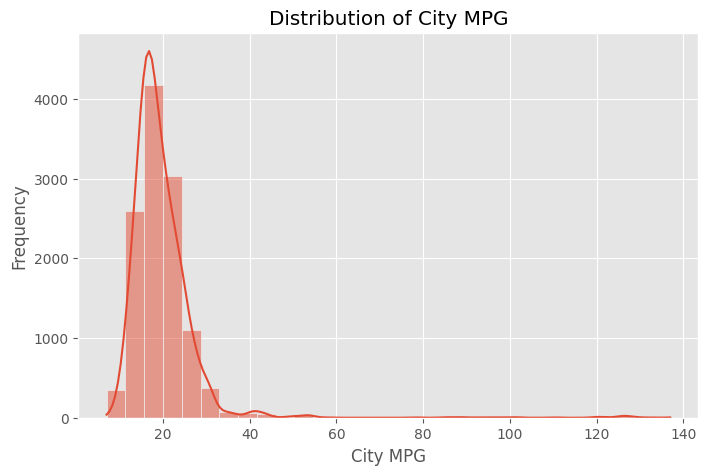

In [ ]:
# Creating a histogram for "City MPG" to visualize its distribution.
# Includes a kernel density estimate (KDE) for better insight into the data spread.

plt.style.use("ggplot")

plt.figure(figsize=(8, 5))
sns.histplot(df_car_clean["City MPG"], bins=30, kde=True)
plt.xlabel("City MPG")
plt.ylabel("Frequency")
plt.title("Distribution of City MPG")
plt.show()

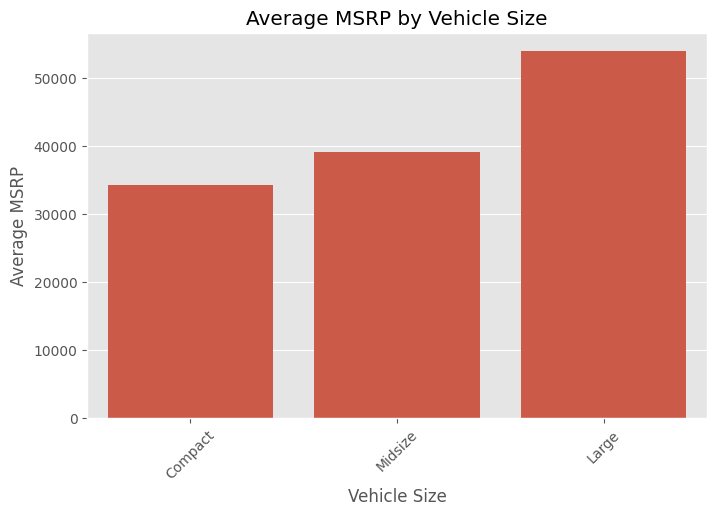

In [ ]:
# Creating a bar plot to visualize the average MSRP by vehicle size.
# The data is grouped by "Vehicle Size" and sorted by mean MSRP for better readability.

plt.figure(figsize=(8, 5))
avg_msrp = df_car_clean.groupby("Vehicle Size")["MSRP"].mean().sort_values()
sns.barplot(x=avg_msrp.index, y=avg_msrp.values)
plt.xlabel("Vehicle Size")
plt.ylabel("Average MSRP")
plt.title("Average MSRP by Vehicle Size")
plt.xticks(rotation=45)
plt.show()

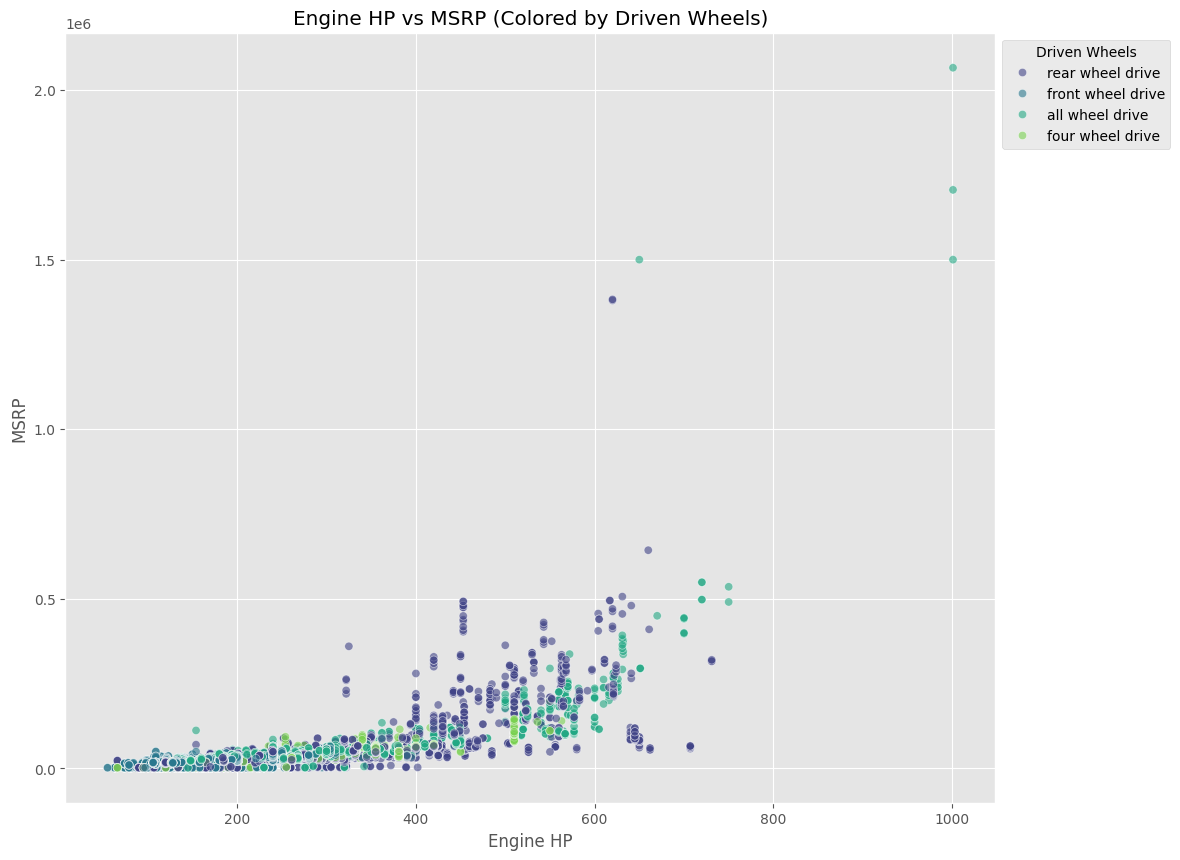

In [ ]:
# Creating a scatter plot to visualize the relationship between "Engine HP" and "MSRP".
# Data points are color-coded by "Driven Wheels" to highlight drivetrain differences.

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=df_car_clean["Engine HP"],
    y=df_car_clean["MSRP"],
    hue=df_car_clean["Driven_Wheels"],
    alpha=0.6,
    palette="viridis"
)
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.title("Engine HP vs MSRP (Colored by Driven Wheels)")
plt.legend(title="Driven Wheels", bbox_to_anchor=(1, 1))
plt.show()


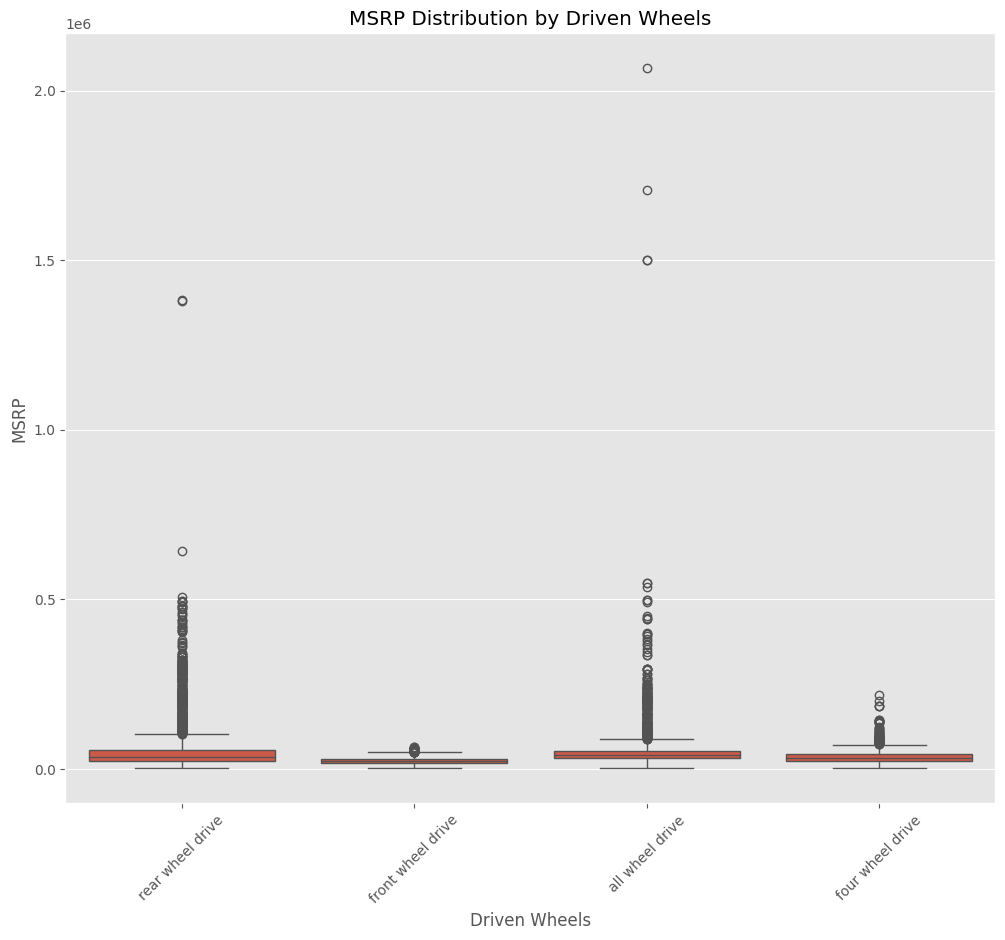

In [ ]:
# Creating a box plot to visualize the MSRP distribution across different "Driven Wheels" categories.
# Helps identify price variations and potential outliers within each drivetrain type.

plt.figure(figsize=(12, 10))
sns.boxplot(x=df_car_clean["Driven_Wheels"], y=df_car_clean["MSRP"])
plt.xlabel("Driven Wheels")
plt.ylabel("MSRP")
plt.title("MSRP Distribution by Driven Wheels")
plt.xticks(rotation=45)
plt.show()

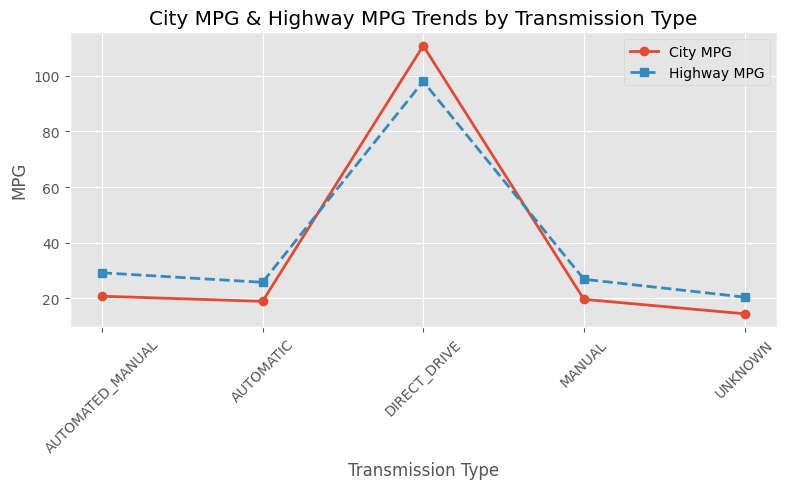

In [ ]:
# Creating a line plot to visualize trends in "City MPG" and "Highway MPG" across different transmission types.
# Data points are averaged for each transmission type to observe fuel efficiency patterns.

avg_mpg = df_car_clean.groupby("Transmission Type")[["City MPG", "Highway MPG"]].mean().sort_index()
x = np.arange(len(avg_mpg))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, avg_mpg["City MPG"], marker="o", linestyle="-", linewidth=2, label="City MPG")
ax.plot(x, avg_mpg["Highway MPG"], marker="s", linestyle="--", linewidth=2, label="Highway MPG")

ax.set_xticks(x)
ax.set_xticklabels(avg_mpg.index, rotation=45)
ax.set_xlabel("Transmission Type")
ax.set_ylabel("MPG")
ax.set_title("City MPG & Highway MPG Trends by Transmission Type")
ax.legend()
plt.tight_layout()
plt.show()

**Correlation Analysis:**

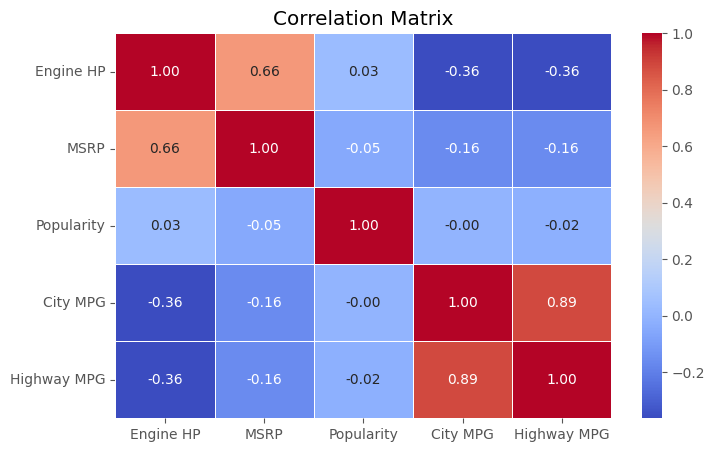

In [ ]:
correlation_columns = ["Engine HP", "MSRP", "Popularity", "City MPG", "Highway MPG"]
correlation_matrix = df_car_clean[correlation_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# **Project Summary: Car Dataset Analysis**  

## **Objective**  
The goal of this project was to clean, transform, and analyze a car dataset to uncover relationships between key vehicle attributes, including performance, pricing, and popularity. By applying data cleaning techniques, statistical analysis, and visualization, meaningful insights were derived.

---

## **Key Findings**  

### **1️⃣ Correlation Analysis**  
- 🔹 **Engine HP & MSRP → Strong Positive Correlation**  
  - Cars with **higher horsepower** tend to be more expensive.  
  - **Explanation:** High-performance engines are typically found in premium vehicles.  

- 🔹 **Engine HP & Fuel Efficiency (MPG) → Negative Correlation**  
  - Cars with **more horsepower consume more fuel**, resulting in lower City MPG and Highway MPG.  
  - **Explanation:** High-performance engines have higher fuel consumption.  

- 🔹 **MSRP & Popularity → Weak or No Correlation**  
  - Vehicle price does not necessarily impact its popularity.  
  - **Explanation:** Affordability and reliability are often bigger factors in consumer preference.  

- 🔹 **City MPG & Highway MPG → Very Strong Positive Correlation**  
  - Cars with good **city fuel efficiency** also tend to perform well on highways.  
  - **Explanation:** Fuel-efficient vehicles generally have optimized fuel consumption in both driving conditions.  

---

## **2️⃣ Descriptive Statistics**  
- The **average MSRP** varies significantly across vehicle categories and engine types.  
- Some **luxury and high-performance models** have extremely high prices, affecting price distribution.  
- **Fuel efficiency distribution** shows that most vehicles fall within a standard MPG range, with some highly efficient models standing out.  

---

## **3️⃣ Data Visualization Insights**  
- 📊 **Scatter Plot (Engine HP vs. MSRP):** Confirms that cars with **higher horsepower** have **higher prices**.  
- 📈 **Box Plot (Driven Wheels vs. MSRP):** Reveals that **all-wheel-drive (AWD) vehicles** tend to be **more expensive**.  
- 📊 **Bar Chart (Vehicle Size vs. MSRP):** Larger vehicles, such as **SUVs and trucks**, generally cost **more than sedans and hatchbacks**.  

---

## **Conclusion**  
This project highlighted the **power of data analysis** in identifying key relationships within the automotive market.  

### 🔥 **Key Takeaways:**  
✅ **Higher horsepower leads to higher prices but lower fuel efficiency.**  
✅ **Fuel-efficient cars perform well in both city and highway conditions.**  
✅ **A higher price does not necessarily make a car more popular.**  

Through this analysis, I gained valuable experience in **data cleaning, correlation analysis, and visualization techniques**, strengthening my ability to extract meaningful insights from complex datasets.

---

**Best regards,**  
**Konstantin Milonas**  

📧 **For any further questions, feel free to contact me via email: info@condata.io**  
